In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from datasketch import MinHash, MinHashLSH
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

# Load the dataset from a .txt file into a DataFrame called df
df = pd.read_csv('SICK_train.txt', delimiter='\t')

# Display the first few rows of all columns to verify the data
print(df.head())

   pair_ID                                         sentence_A  \
0        1  A group of kids is playing in a yard and an ol...   
1        2  A group of children is playing in the house an...   
2        3  The young boys are playing outdoors and the ma...   
3        5  The kids are playing outdoors near a man with ...   
4        9  The young boys are playing outdoors and the ma...   

                                          sentence_B  relatedness_score  \
0  A group of boys in a yard is playing and a man...                4.5   
1  A group of kids is playing in a yard and an ol...                3.2   
2  The kids are playing outdoors near a man with ...                4.7   
3  A group of kids is playing in a yard and an ol...                3.4   
4  A group of kids is playing in a yard and an ol...                3.7   

  entailment_judgment  
0             NEUTRAL  
1             NEUTRAL  
2          ENTAILMENT  
3             NEUTRAL  
4             NEUTRAL  


In [2]:
# Load the NLI dataset or any suitable dataset for similarity search testing
# Assume the dataset is loaded into a DataFrame called df

# Extract 'sentence_A' from the dataset
sentences = df['sentence_A'].tolist()
print(sentences)

['A group of kids is playing in a yard and an old man is standing in the background', 'A group of children is playing in the house and there is no man standing in the background', 'The young boys are playing outdoors and the man is smiling nearby', 'The kids are playing outdoors near a man with a smile', 'The young boys are playing outdoors and the man is smiling nearby', 'Two dogs are fighting', 'A brown dog is attacking another animal in front of the man in pants', 'A brown dog is attacking another animal in front of the man in pants', 'Nobody is riding the bicycle on one wheel', 'A person is riding the bicycle on one wheel', 'A person on a black motorbike is doing tricks with a jacket', 'A man with a jersey is dunking the ball at a basketball game', 'A man with a jersey is dunking the ball at a basketball game', 'The player is dunking the basketball into the net and a crowd is in background', 'Two people are kickboxing and spectators are not watching', 'Two young women are sparring 

In [16]:
# Create shingles for the extracted sentences
shingle_size = 3  # Adjust as needed
shingles = []
for sentence in sentences:
    sentence = sentence.lower()
    words = sentence.split()
    for i in range(len(words) - shingle_size + 1):
        shingle = ' '.join(words[i:i+shingle_size])
        shingles.append(shingle)
print(shingles)

['a group of', 'group of kids', 'of kids is', 'kids is playing', 'is playing in', 'playing in a', 'in a yard', 'a yard and', 'yard and an', 'and an old', 'an old man', 'old man is', 'man is standing', 'is standing in', 'standing in the', 'in the background', 'a group of', 'group of children', 'of children is', 'children is playing', 'is playing in', 'playing in the', 'in the house', 'the house and', 'house and there', 'and there is', 'there is no', 'is no man', 'no man standing', 'man standing in', 'standing in the', 'in the background', 'the young boys', 'young boys are', 'boys are playing', 'are playing outdoors', 'playing outdoors and', 'outdoors and the', 'and the man', 'the man is', 'man is smiling', 'is smiling nearby', 'the kids are', 'kids are playing', 'are playing outdoors', 'playing outdoors near', 'outdoors near a', 'near a man', 'a man with', 'man with a', 'with a smile', 'the young boys', 'young boys are', 'boys are playing', 'are playing outdoors', 'playing outdoors and'

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a vocabulary using CountVectorizer
vectorizer = CountVectorizer(binary=True)
one_hot_matrix = vectorizer.fit_transform(shingles)
vocabulary = vectorizer.get_feature_names_out()
print(vocabulary)

['about' 'above' 'abruptly' ... 'young' 'zoo' 'zucchini']


In [22]:
# Generate one-hot encodings
one_hot_encodings = one_hot_matrix.toarray()

# Print the shape of the one-hot encodings
print("Shape of one-hot encodings:", one_hot_encodings.shape)

# Confirm we have 1s in the encoded list
print("Example of encoded list with 1s:", one_hot_encodings[0])

# Initialize a flag to check if 1's are present
has_ones = False

# Iterate through the one-hot encodings array
for encoding in one_hot_encodings:
    if 1 in encoding:
        has_ones = True
        break

# Print the result
if has_ones:
    print("The one-hot encodings array contains 1's.")
else:
    print("The one-hot encodings array does not contain 1's.")

Shape of one-hot encodings: (34751, 1954)
Example of encoded list with 1s: [0 0 0 ... 0 0 0]
The one-hot encodings array contains 1's.


In [25]:
# Perform MinHashing with 100 hash functions
num_hashes = 100
minhashes = []
for encoding in one_hot_encodings:
    minhash = MinHash(num_perm=num_hashes)
    for idx, val in enumerate(encoding):
        if val == 1:
            minhash.update(vocabulary[idx].encode('utf8'))
    minhashes.append(minhash)
print(minhashes)

[<datasketch.minhash.MinHash object at 0x00000161FB045D10>, <datasketch.minhash.MinHash object at 0x00000161FB046A90>, <datasketch.minhash.MinHash object at 0x00000161FB046B90>]


In [26]:
# Get the MinHash signature (list of integers) using the `.hashvalues` attribute
signature_vector = minhash.hashvalues

# Print the signature vector
print("Signature vector (MinHash):", signature_vector)

Signature vector (MinHash): [ 228630785 2375314086 1010295474   41423579  447328345 3047424134
 2558842969 2627234100  601939071 1090489399 1733422446  738206585
 2067941657 2940867214 1037649878 2600382622   55084861 1245180219
  986894568 1487251681 2780563271 2208663114 1776868710  134510540
 2791509577 1303303638 3341208314 2243111944  168596151 1232365599
  470659639  304299340  807694977 1043649028 2790177508 3477557276
 2691437402 3802812989  346464810  677208186  800601232 2914580342
  155310948  467512847 1689972195  327166502 3707391566 1453901961
  391087693  488744873 2617651390 1101731522 2753698029 1473652842
  244365221  777881710   71835807 2495796321 2912297646  522502596
 1910077067 2642206746 1090597764 2181803727 1786806388  647220103
 2107524738 2138324421 2309033303 1557301129 1273450442  778536295
  980369463    7409211 1824797186 1403494380  948595984   73548248
 2252815941  644466326 1926876780 1181483239 1147893210 2110823525
 1536244443 1898623317 1390351484 

In [31]:
# Perform LSH (banding) with b=20
b = 20
lsh = MinHashLSH(threshold=0.5, num_perm=num_hashes, params=(b, 1))
for idx, minhash in enumerate(minhashes):
    lsh.insert(str(idx), minhash)

# Check how many candidate pairs we have
candidate_pairs_b20 = []
for idx, minhash in enumerate(minhashes):
    candidate_pairs_b20.extend(lsh.query(minhash))

print("Number of candidate pairs with b=20:", len(candidate_pairs_b20))

Number of candidate pairs with b=20: 7


In [33]:
# Perform LSH (banding) with b=25
b = 25
lsh = MinHashLSH(threshold=0.5, num_perm=num_hashes, params=(b, 1))
for idx, minhash in enumerate(minhashes):
    lsh.insert(str(idx), minhash)

# Check how many candidate pairs we have
candidate_pairs_b25 = []
for idx, minhash in enumerate(minhashes):
    candidate_pairs_b25.extend(lsh.query(minhash))

print("Number of candidate pairs with b=25:", len(candidate_pairs_b25))

Number of candidate pairs with b=25: 7


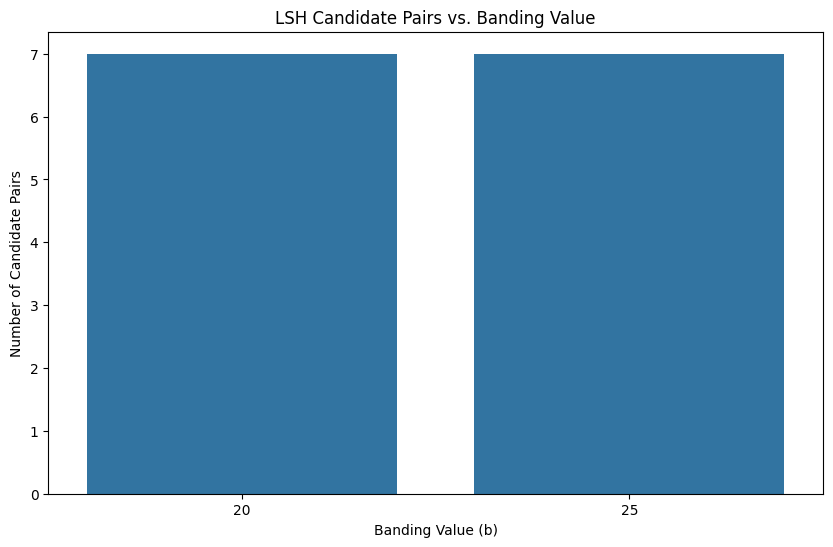

In [34]:
# Include visualizations of different banding values using seaborn
bands_values = [20, 25]
num_candidates = [len(candidate_pairs_b20), len(candidate_pairs_b25)]

plt.figure(figsize=(10, 6))
sns.barplot(x=bands_values, y=num_candidates)
plt.xlabel('Banding Value (b)')
plt.ylabel('Number of Candidate Pairs')
plt.title('LSH Candidate Pairs vs. Banding Value')
plt.show()
